# Homework 6

In [140]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

### 1. Solve the 1D time-dependent Schrodinger equation for a Gaussian pulse impacting a potential barrier. Use units in which  $\hbar = 1$ and $m = 1$. The barrier should be a top-hat function centered at $x = 0$ and have a width of $1.0$ and have a width of $1.0$ (length units), and a height of $1,000$ (energy units).

### The starting wave function is:

## $$ \psi_0 = \psi_{(t = 0, x)} = C e^{\frac{-(x - x_{0})^2}{2 \sigma^2}} e^{ik(x - x_0)} $$

### where $ x_0 = -3; k = 50; \sigma = 0.25; $ and $ C $ is a normalization constant for you to determine. It would be good for your program to output

### $$ integrated probability = \int_{-\infty}^{\infty} \psi^*_0 \psi_0 dx $$

### to confirm that the total probability is unity.


### Your program should output a video of duration 0.2 (time units), showing the evolution of the wavefunction for $ -5 < x < 5 $ (length units). $ \Delta x  = \Delta t = 0.001 $ should be an adequate grid spacing.

### Note that the boundary conditions are your choice, e.g. periodic, reflecting, or just ignoring boundary effeects (by making the domain big enough that edge effects don't appear in your animation).

### Submit your code hw06a.py along with an animation, shro1d.mp4

Time for solution is: 0.0047465165456136065 minutes


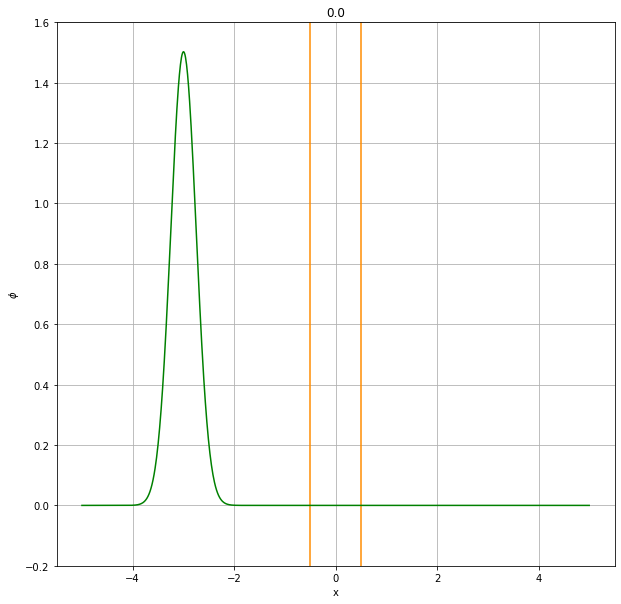

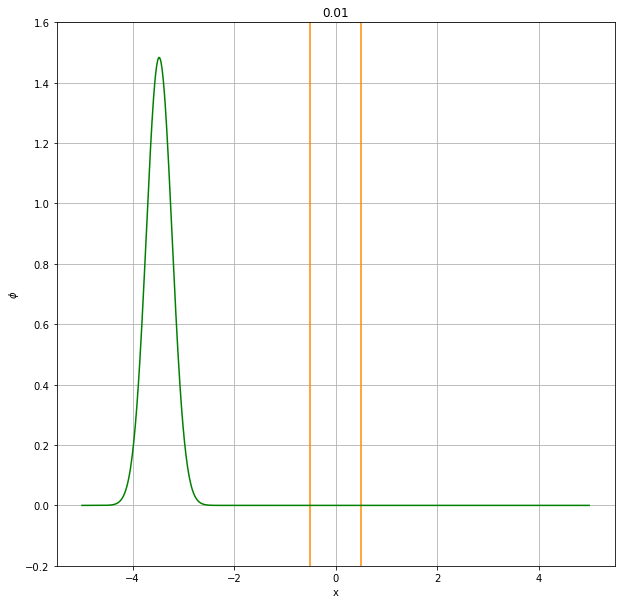

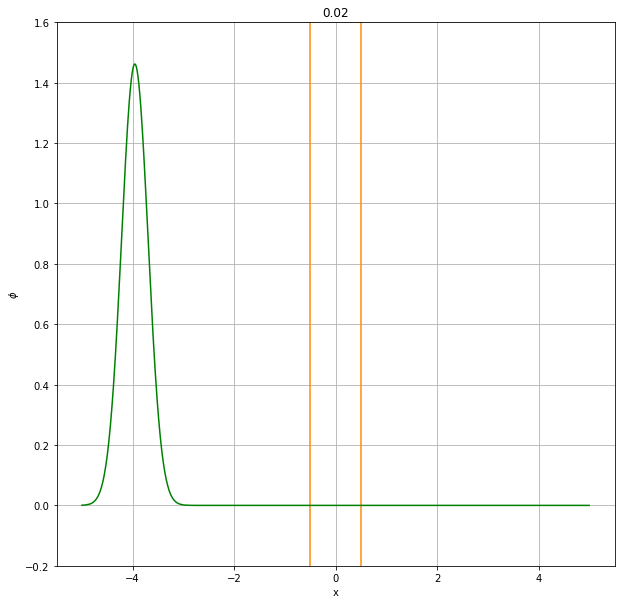

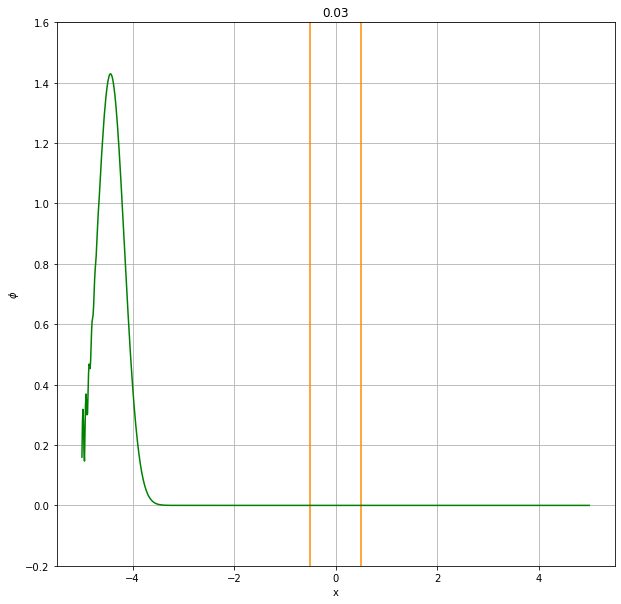

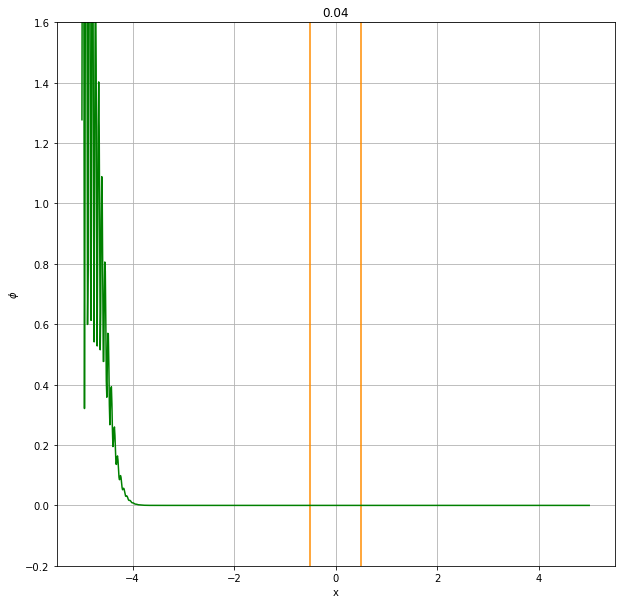

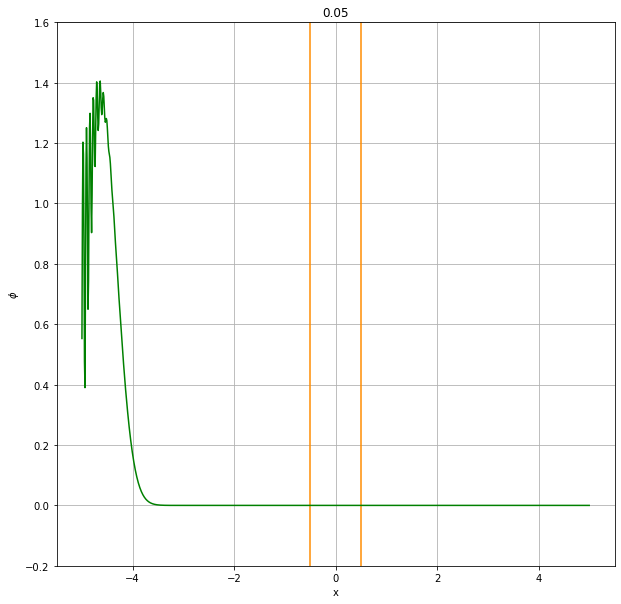

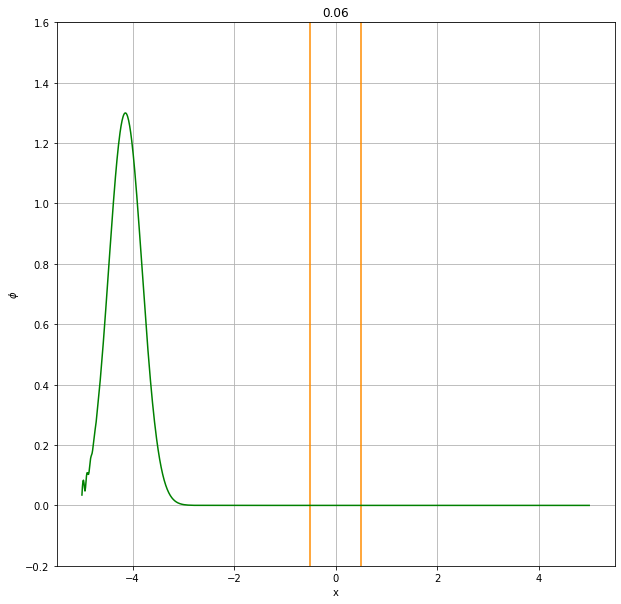

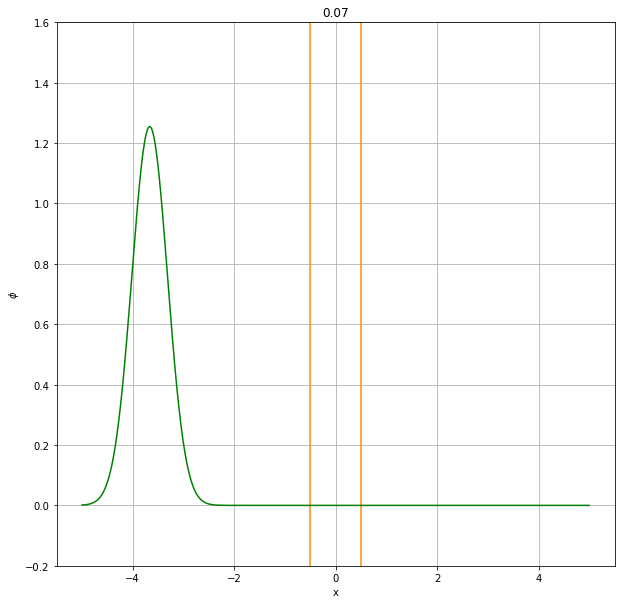

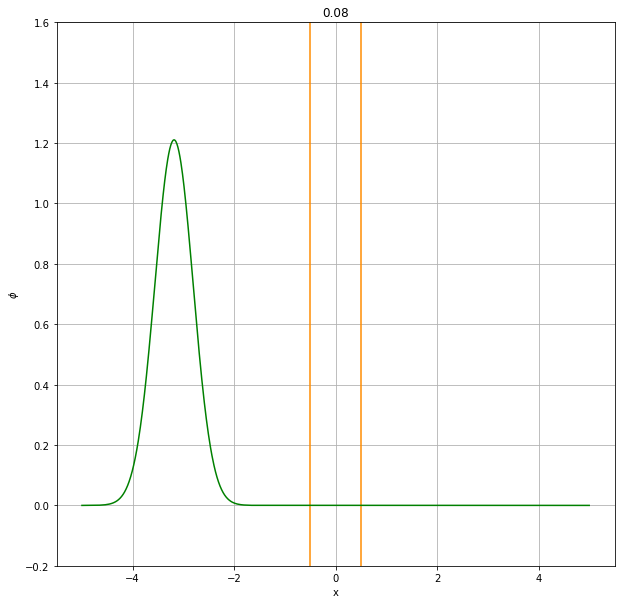

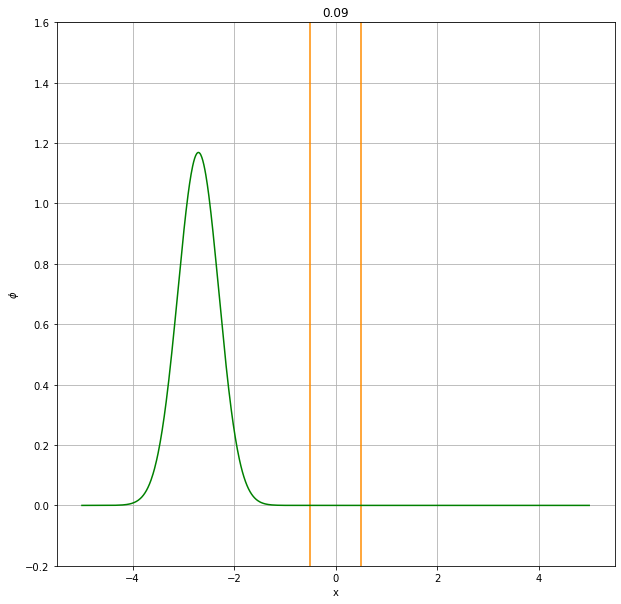

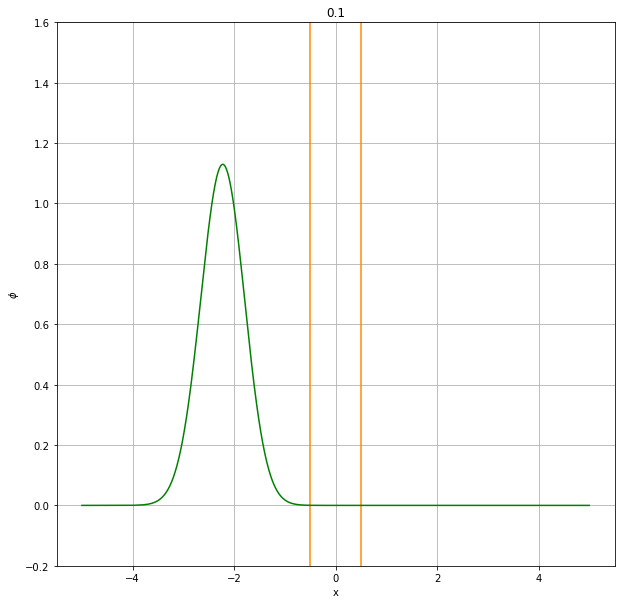

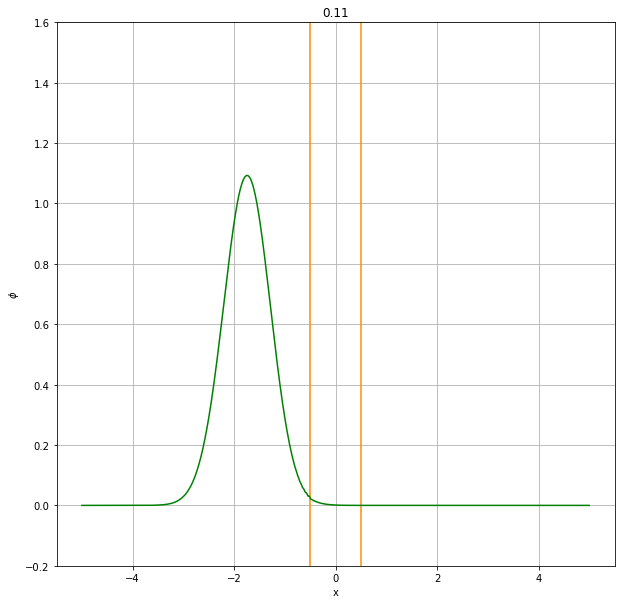

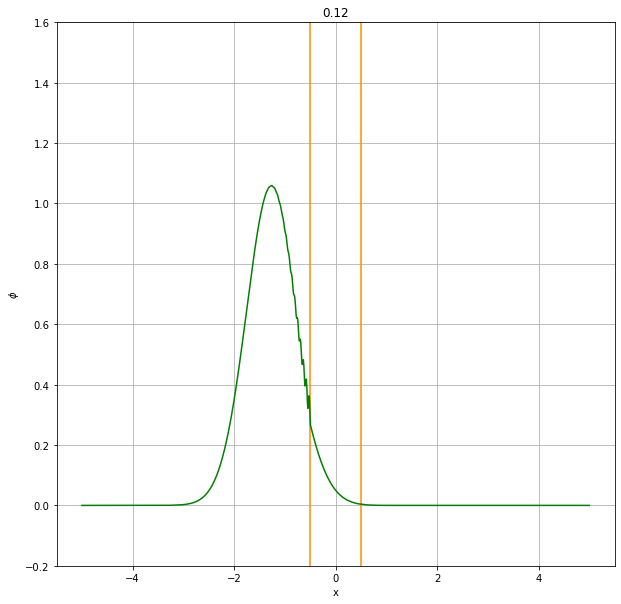

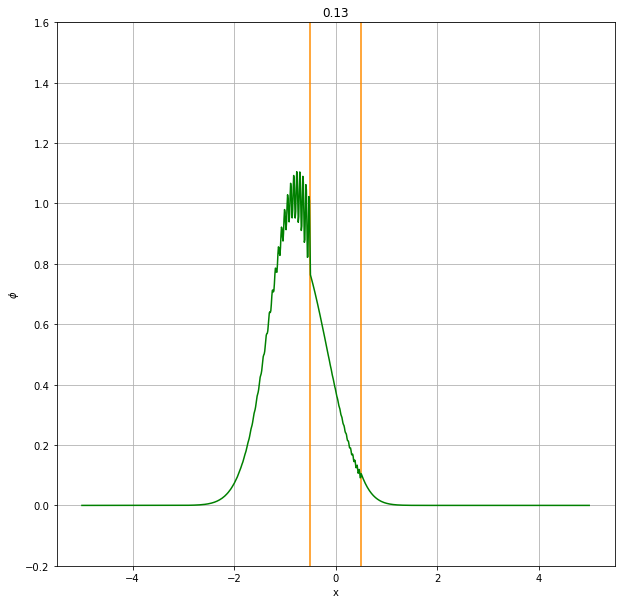

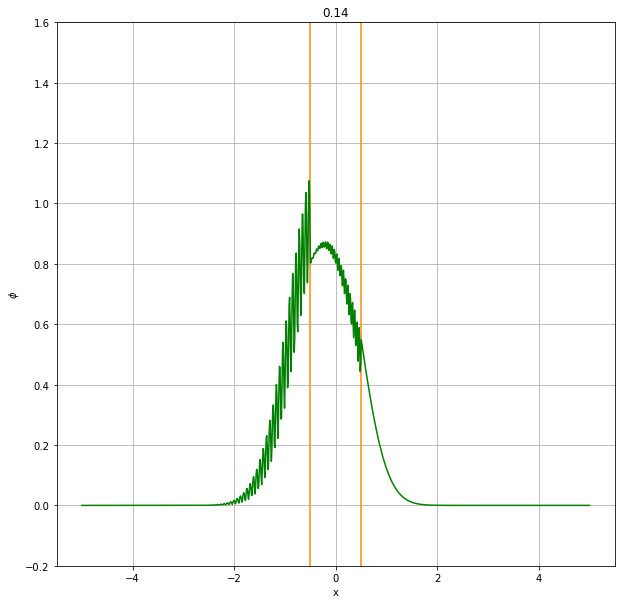

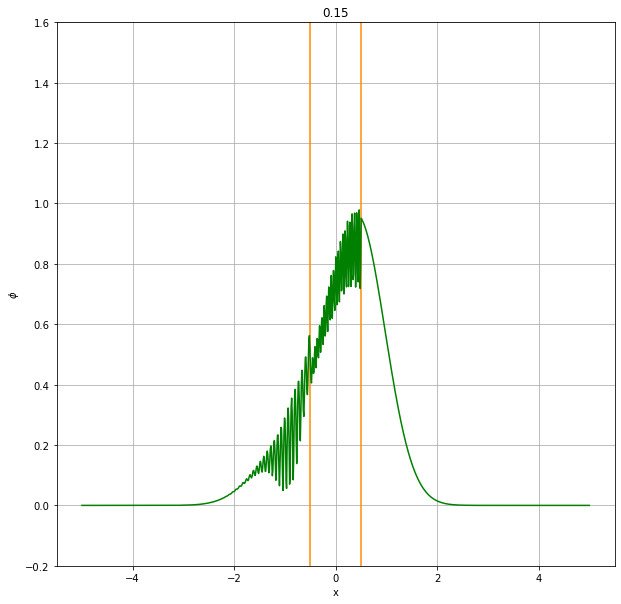

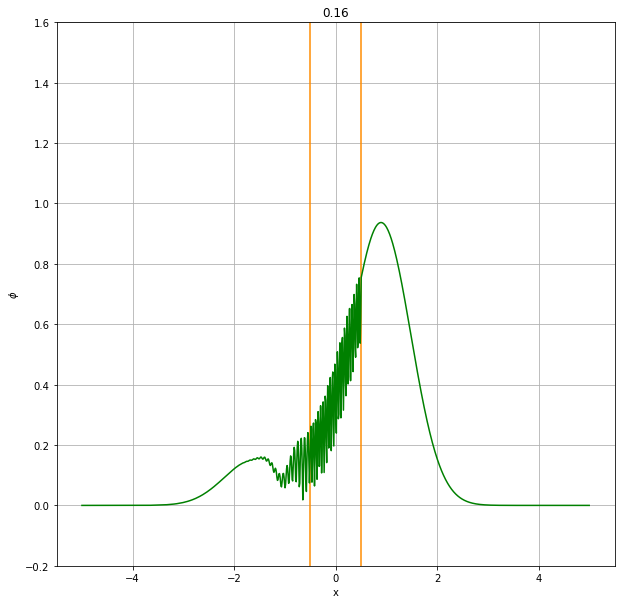

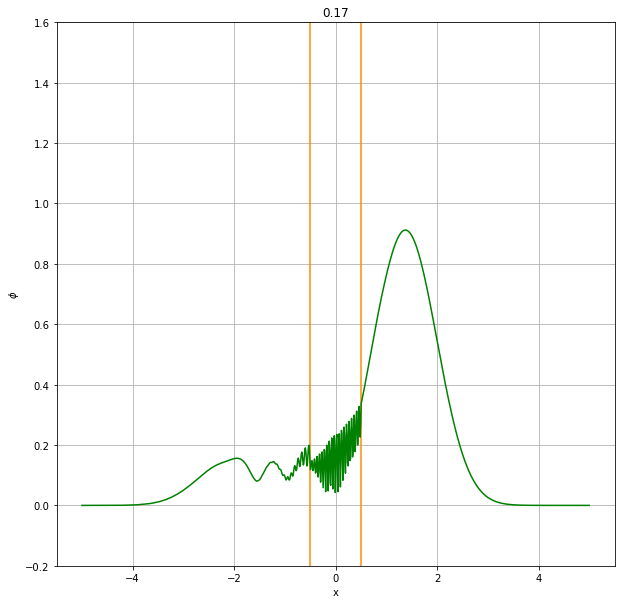

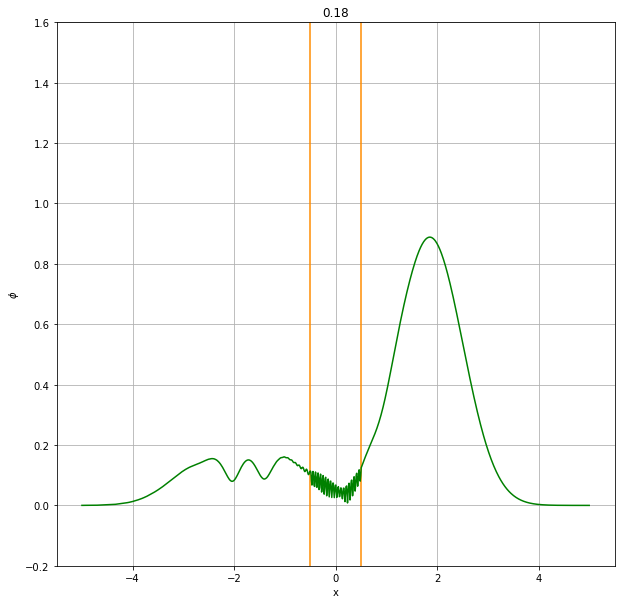

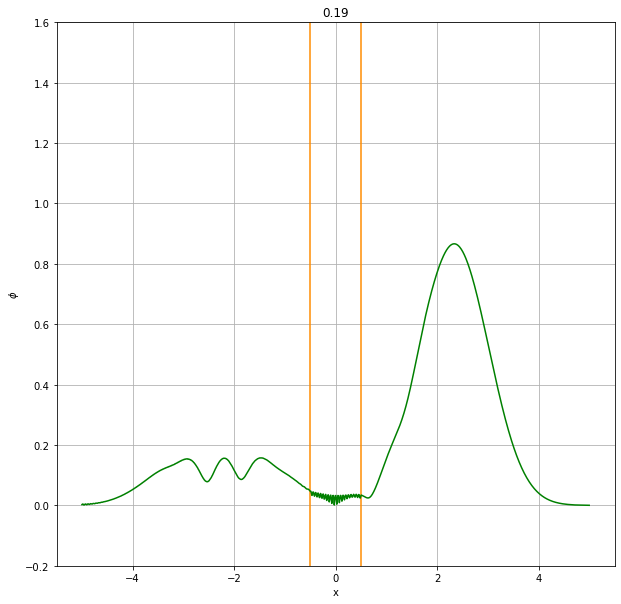

In [183]:
# Homework 6a
#
# This program solves a time-dependent Shrodinger equation for a Gaussian pulse impacting a potential barrier.
#
# @author Scott Merkley
# @version April 18, 2022

%reset -f

import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
from scipy import integrate
import os
import sys
import time


# Setting constants
hBar = 1
m = 1
x0 = -3
k = 50
sigma = 0.25
dx = 0.001
dt = dx

x = np.arange(-5, 5, dx)
t = np.arange(0, 0.2, dt)

# Setting up the step function
def stepFunction(x):
    stepHeight = 1000
    y = np.where((x < -0.5) | (x > 0.5), 0, stepHeight)
    return y

V = stepFunction(x)
C = 1 / (sigma * np.sqrt(np.pi))
initialPsi = np.sqrt(C) * np.exp(-(x - x0)**2 / (2 * sigma**2)) * np.exp(1j * k * (x - x0))
diagonalArray = sparse.diags([1, -2, 1], [-1, 0, 1], shape = (len(x), len(x))) / dx**2

def dPsidt(t, psi):
    return 1j * (1 / 2 * hBar / m * diagonalArray.dot(psi) + V / hBar * psi)

initialTime = time.time()

sol = integrate.solve_ivp(dPsidt, t_span = [t.min(), t.max()], t_eval = t, y0 = initialPsi, method = 'RK23')

finalTime = time.time()

print(f'Time for solution is: {(finalTime - initialTime) / 60:0.4} minutes')


for j in range(len(t)):
            
    fileName = '%05d.png' % j
        
    fig = plt.figure(figsize = (10, 10))
    plt.title(f'{t[j]:0.3}')
    plt.axvline(x = 0.5, color = 'darkorange')
    plt.axvline(x = -0.5, color = 'darkorange')
    plt.plot(x, abs(sol.y[:, j]), color = 'g')
    plt.ylim(ymin = -0.2, ymax = 1.6)
    plt.xlabel('x')
    plt.ylabel('$ \phi $')
    plt.grid()
#     plt.savefig(fileName)
#     plt.close(fig)
    plt.show()
    
    
# Stitching the Frames Together
# os.system("rm schro1d.mp4")
# os.system("ffmpeg -i %05d.png -vf scale=800x800 schro1d.mp4")
# os.system("rm *.png") 

# b

[[ 9.98999000e+02 -9.98999000e+02  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.99700599e-03 -2.00000000e+00  1.99800299e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  5.00749376e-01 -2.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -2.00000000e+00
   1.00100201e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  9.98998999e-01
  -2.00000000e+00  1.00100100e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00 -1.00099900e+00]]

The solution took 0.027163267135620117 seconds to calculate.


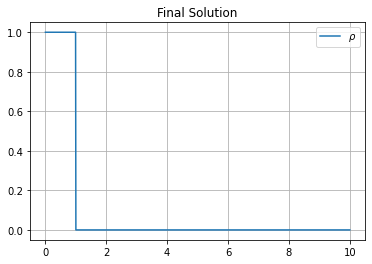

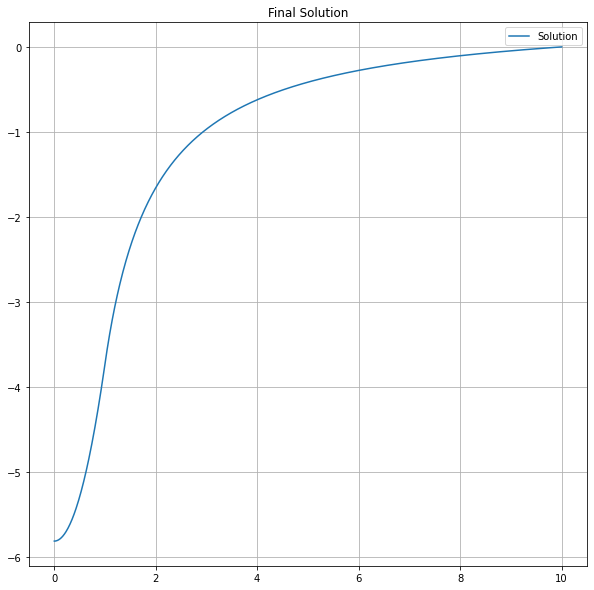

In [181]:
# Homework 6 Part b
#
# This program will consider the 1D Laplace equation in spherical symmetry and calculate its boundary conditions
#
# @author Scott Merkley
# @version April 24, 2022

%reset -f

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import time
from scipy import linalg

# Parameters
nBins = 1000
rMin  = 0.00001
rMax  = 10
dr    = (rMax - rMin) / nBins

r     = np.linspace(rMin, rMax, nBins)

# Define a function for Rho
def rho(r):
    return np.where((r < 1), 1, 0)

# Define the Source term 'S'
rightHandSide = dr**2 * 4 * np.pi * rho(r)

# Define the matrix A on the left hand side
v = np.zeros((nBins, nBins))
for i in range(1, nBins - 1):
    v[i, i - 1] = 1 - dr / r[i]
    v[i, i]     = -2
    v[i, i + 1] = 1 + dr / r[i]
    
v[0, 0] = -(1 - dr / r[0])
v[0, 1] = 1 - dr / r[0]
v[-1, -1] = r[-1] / (r[-1] + dr) - 2
            
print(v)

initialTime = time.time()
sol         = linalg.solve(v, rightHandSide)
finalTime   = time.time()

print(f'\nThe solution took {finalTime - initialTime} seconds to calculate.')

# Plot the final solution
plt.title('Final Solution')
plt.plot(r, rho(r), label = r'$\rho$')
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize = (10, 10))
plt.title('Final Solution')
plt.plot(r, sol, label = 'Solution')
plt.grid()
plt.legend()
plt.show()
